##  Bollinger

In [7]:
# Estrategia de trading utilizando Bandas de Bollinger
class BBand_Strategy(bt.Strategy):
    params = (('period', 20), ('devfactor', 2.0),)

    def __init__(self):
        self.data_close = self.datas[0].close
        self.data_open = self.datas[0].open

        self.order = None
        self.price = None
        self.comm = None

        self.b_band = bt.ind.BollingerBands(self.datas[0], period=self.p.period, devfactor=self.p.devfactor)
        self.buy_signal = bt.ind.CrossOver(self.datas[0], self.b_band.lines.bot)
        self.sell_signal = bt.ind.CrossOver(self.datas[0], self.b_band.lines.top)

    def log(self, txt):
        dt = self.datas[0].datetime.date(0).isoformat()
        print(f'{dt}, {txt}')

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            return

        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(f'BUY EXECUTED --- Price: {order.executed.price:.2f}, Cost: {order.executed.value:.2f}, Commission: {order.executed.comm:.2f}')
                self.price = order.executed.price
                self.comm = order.executed.comm
            else:
                self.log(f'SELL EXECUTED --- Price: {order.executed.price:.2f}, Cost: {order.executed.value:.2f}, Commission: {order.executed.comm:.2f}')

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Failed')
            self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return
        self.log(f'OPERATION RESULT --- Gross: {trade.pnl:.2f}, Net: {trade.pnlcomm:.2f}')

    def next_open(self):
        if not self.position:
            if self.buy_signal > 0:
                size = int(self.broker.getcash() / self.datas[0].open)
                self.log(f'BUY CREATED --- Size: {size}, Cash: {self.broker.getcash():.2f}, Open: {self.data_open[0]}, Close: {self.data_close[0]}')
                self.buy(size=size)
        else:
            if self.sell_signal < 0:
                self.log(f'SELL CREATED --- Size: {self.position.size}')
                self.sell(size=self.position.size)



In [8]:
# Configuración del backtesting
start = datetime.datetime(2023, 1, 1)
end = datetime.datetime(2023, 12, 31)



In [9]:
# Cargar datos desde un archivo CSV
data = bt.feeds.GenericCSVData(
    dataname='C:\\Users\\nicol\\OneDrive\\Portafolio\\Portfolio 1\\Chapter_2\\MSFT_historical_data.csv',
    fromdate=start,
    todate=end,
    nullvalue=0.0,
    dtformat=('%Y-%m-%d %H:%M:%S%z'),  # Usando solo la parte de la fecha
    datetime=0,
    high=2,
    low=3,
    open=1,
    close=4,
    volume=5,
    openinterest=-1,
    reverse=False
)




cerebro = bt.Cerebro(stdstats=False, cheat_on_open=True)
cerebro.addstrategy(BBand_Strategy)
cerebro.adddata(data)
cerebro.broker.setcash(10000.0)
cerebro.broker.setcommission(commission=0.001)
cerebro.addobserver(bt.observers.BuySell)
cerebro.addobserver(bt.observers.Value)
cerebro.addanalyzer(bt.analyzers.Returns, _name='returns')
cerebro.addanalyzer(bt.analyzers.TimeReturn, _name='time_return')

# Ejecución del backtest
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
try:
    backtest_result = cerebro.run()
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
except Exception as e:
    print("Error encountered:", e)

Starting Portfolio Value: 10000.00
2023-04-27, BUY CREATED --- Size: 34, Cash: 10000.00, Open: 294.1035120701572, Close: 302.9076232910156
2023-04-27, Order Failed
2023-09-26, BUY CREATED --- Size: 31, Cash: 10000.00, Open: 314.4916852480885, Close: 311.50775146484375
2023-09-26, BUY EXECUTED --- Price: 314.49, Cost: 9749.24, Commission: 9.75
2023-11-10, SELL CREATED --- Size: 31
2023-11-10, SELL EXECUTED --- Price: 360.76, Cost: 9749.24, Commission: 11.18
2023-11-10, OPERATION RESULT --- Gross: 1434.25, Net: 1413.32
2023-12-18, BUY CREATED --- Size: 30, Cash: 11413.32, Open: 369.45001220703125, Close: 372.6499938964844
2023-12-18, BUY EXECUTED --- Price: 369.45, Cost: 11083.50, Commission: 11.08
Final Portfolio Value: 11599.93


In [10]:
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
backtest_result = cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 11599.93
2023-04-27, BUY CREATED --- Size: 34, Cash: 10000.00, Open: 294.1035120701572, Close: 302.9076232910156
2023-04-27, Order Failed
2023-09-26, BUY CREATED --- Size: 31, Cash: 10000.00, Open: 314.4916852480885, Close: 311.50775146484375
2023-09-26, BUY EXECUTED --- Price: 314.49, Cost: 9749.24, Commission: 9.75
2023-11-10, SELL CREATED --- Size: 31
2023-11-10, SELL EXECUTED --- Price: 360.76, Cost: 9749.24, Commission: 11.18
2023-11-10, OPERATION RESULT --- Gross: 1434.25, Net: 1413.32
2023-12-18, BUY CREATED --- Size: 30, Cash: 11413.32, Open: 369.45001220703125, Close: 372.6499938964844
2023-12-18, BUY EXECUTED --- Price: 369.45, Cost: 11083.50, Commission: 11.08
Final Portfolio Value: 11599.93


<IPython.core.display.Javascript object>


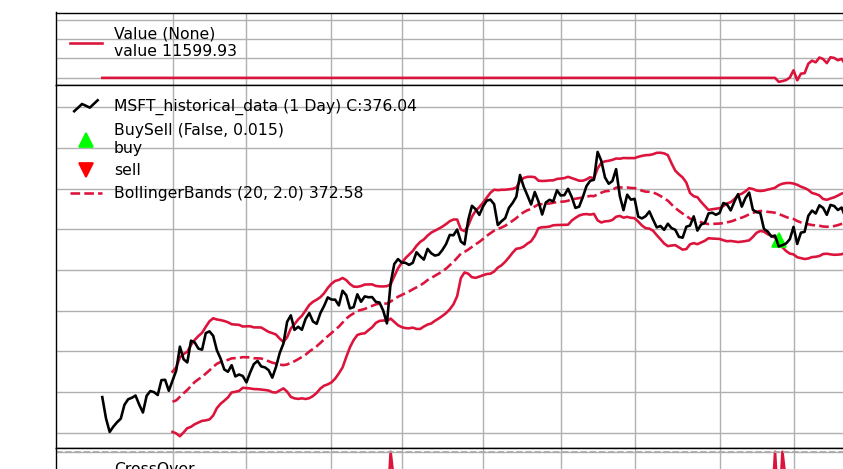

[[<Figure size 900x500 with 4 Axes>]]

In [11]:
import matplotlib.pyplot as plt

# Establece el tamaño del gráfico a un valor más pequeño
plt.rcParams['figure.figsize'] = [9, 5]  # Ancho, Altura en pulgadas
plt.rcParams['figure.dpi'] = 100  # Resolución en DPI (puntos por pulgada)


cerebro.plot(iplot=True, volume=False)

The Graph
The graph displays several elements:

Black Line (Closing Price): This is the line that represents the closing price of Microsoft (MSFT) stock over time.

Bollinger Bands (Dashed Red Lines): These are two lines that represent volatility around the closing price. The upper and lower bands are calculated with a specific number of standard deviations (in this case, 2.0) above and below a Simple Moving Average (SMA) of 20 periods.

Green and Red Triangles: These are the buy signals (upward green triangles) and sell signals (downward red triangles). The signals are generated when the price crosses the lower Bollinger band for a buy signal or the upper band for a sell signal.

Upper Red Line (Portfolio Value): Represents the value of the portfolio over time. It starts with an initial capital value and changes based on the results of the trading operations.

Lower Panels (Crossover Signals): These show the intensity of the crossover signals. A positive crossover might indicate a buy signal, while a negative crossover might suggest a sell signal.

The Code
The accompanying code defines a trading strategy using Bollinger Bands and then backtests this strategy with historical MSFT data.

BBand_Strategy Class: This class inherits from bt.Strategy and outlines the trading strategy's logic. It uses Bollinger Bands and generates buy and sell signals based on the crossings of these bands.

__init__ Method: Initializes the indicators and necessary variables for the strategy, including the Bollinger Bands and the crossover signals.

notify_order and notify_trade Methods: These are responsible for logging and handling the executed orders and trades, respectively.

next_open Method: Defines the trading logic to be executed at each new period (each new price bar), determining whether buy or sell orders should be created.

Backtest Configuration: Sets the initial configuration for the backtest, including the initial capital, commission, and adds observers and analyzers to monitor the strategy's performance.

Backtest Execution: The strategy is run with the loaded data, and the final portfolio value is printed.

Result Visualization: Matplotlib parameters are set to adjust the size and resolution of the graph, and then cerebro.plot() is called to generate the result chart.

The error you encountered is due to a misuse of the datetime module. To resolve it, ensure that imports and references to datetime are correctly applied. If the datetime class is imported from the datetime module, then you should use datetime(2023, 1, 1). If the entire datetime module is imported, then use datetime.datetime(2023, 1, 1).